<center>
    <img src="MyLogo.PNG" width="500" />
</center>

#### Dataset Description
---

- <b>Car_ID	</b> :		Unique id of each observation (Interger)		
- <b>Symboling </b> :			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. (Categorical)
- <b>CarCompany</b> :			Name of car company (Categorical)		
- <b>    fueltype</b> :			Car fuel type i.e gas or diesel (Categorical)		
- <b>    aspiration	</b> :		Aspiration used in a car (Categorical)		
- <b>    doornumber	</b> :		Number of doors in a car (Categorical)		
- <b>    carbody</b> :			body of car (Categorical)		
- <b>    drivewheel	</b> :		type of drive wheel (Categorical)		
- <b>    enginelocation	</b> :		Location of car engine (Categorical)		
- <b>    wheelbase</b> :			Weelbase of car (Numeric)		
- <b>   carlength</b> :			Length of car (Numeric)		
- <b>   carwidth</b> :			Width of car (Numeric)		
- <b>   carheight</b> :			height of car (Numeric)		
- <b>    curbweight	</b> :		The weight of a car without occupants or baggage. (Numeric)		
- <b>    enginetype	</b> :		Type of engine. (Categorical)		
- <b>    cylindernumber	</b> :		cylinder placed in the car (Categorical)		
- <b>    enginesize	</b> :		Size of car (Numeric)		
- <b>    fuelsystem	</b> :		Fuel system of car (Categorical)		
- <b>    boreratio	</b> :		Boreratio of car (Numeric)		
- <b>    stroke	</b> :		Stroke or volume inside the engine (Numeric)		
- <b>    compressionratio </b> :			compression ratio of car (Numeric)		
- <b>    horsepower	</b> :		Horsepower (Numeric)		
- <b>    peakrpm</b> :			car peak rpm (Numeric)		
- <b>    citympg</b> :			Mileage in city (Numeric)		
- <b>    highwaympg	</b> :		Mileage on highway (Numeric)		
- <b>   price(Dependent variable)</b> :			Price of car (Numeric)		


# Some Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Loading Dataset

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Understanding and Preparing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

> Our dataset has no missing data

> Our dataset contains 8 floats, 8 integers and 10 objects(strings)

> Our dataset data are all in the correct data format

------------------------------------------------

- In our dataset description we have a column named CompanyName which contains the name of the company,

- But, as we see above, the third column is the CarName which contains both the name of the company and the car.

- We will now split the company name from the car name and add it as a new column in our dataset.

In [5]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- We can see that some company names are spelled wrong like maxda, vokswagen, toyouta, etc.

- So we will do some replacements to make our CompanyName column easier to be read.

In [7]:
# Converting all our company names to lowercase letters
df['CompanyName'] = df['CompanyName'].str.lower()

# Replace the wrong spelled & abbreviated names
df['CompanyName'].replace("alfa-romero","alfa-romeo",inplace=True)
df['CompanyName'].replace("maxda","mazda",inplace=True)
df['CompanyName'].replace("porcshce","porsche",inplace=True)
df['CompanyName'].replace("vokswagen","volkswagen",inplace=True)
df['CompanyName'].replace("vw","volkswagen",inplace=True)
df['CompanyName'].replace("toyouta","toyota",inplace=True)

df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

------------------------

- Now let's have some information about our dataset

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Frequency of Companies'}, xlabel='CompanyName', ylabel='count'>

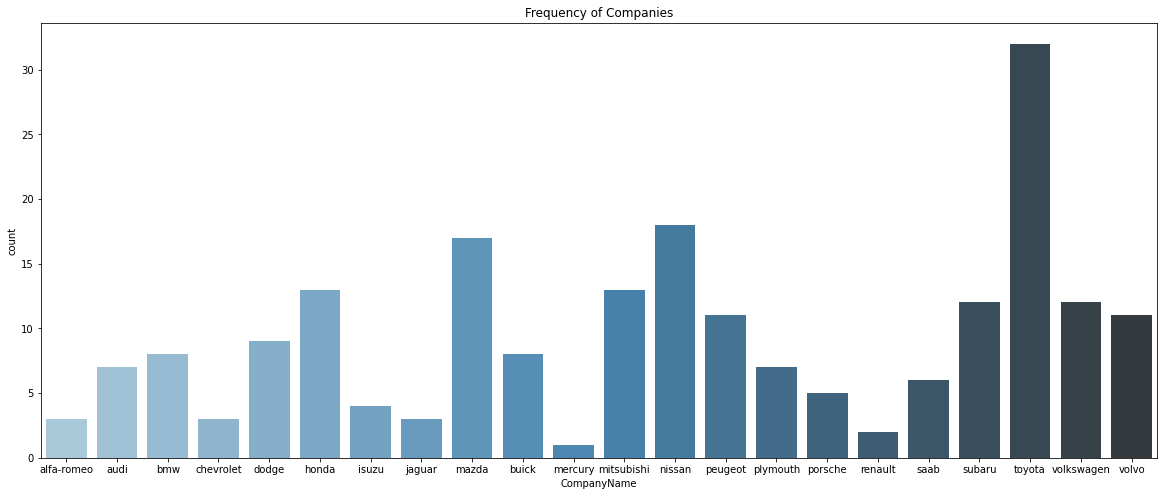

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
plt.title('Frequency of Companies')
sns.countplot(df.CompanyName, palette=("Blues_d"))

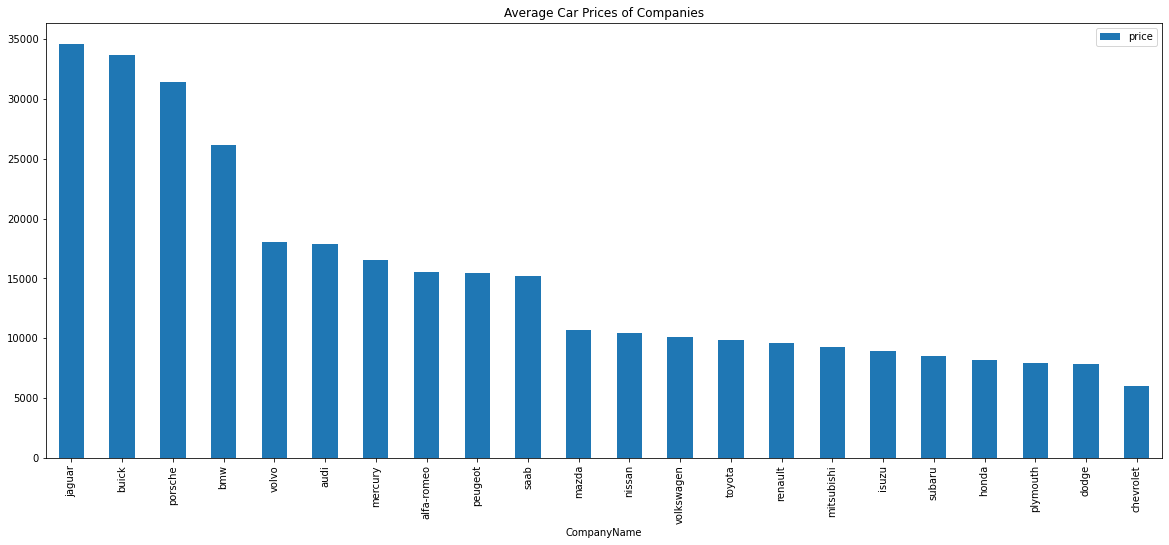

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
graph = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
graph.plot.bar(ax=ax)
plt.title('Average Car Prices of Companies')
plt.show()

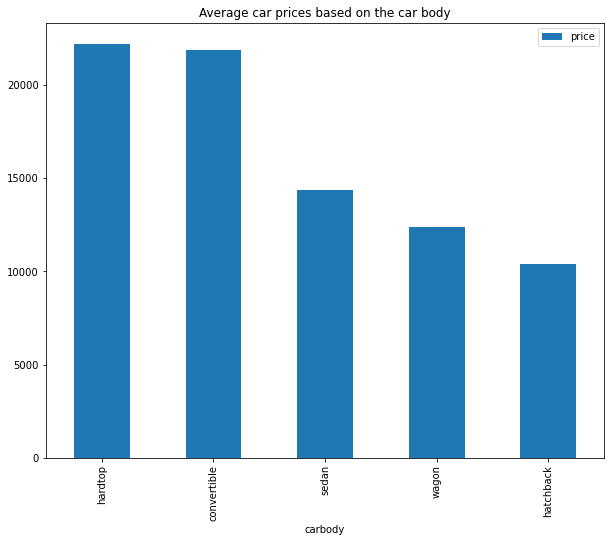

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
graph = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
graph.plot.bar(ax=ax)
plt.title('Average car prices based on the car body')
plt.show()

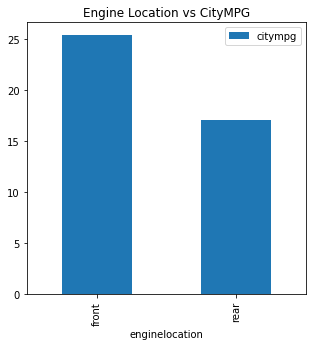

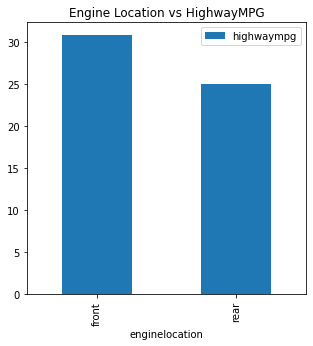

In [11]:
fig, ax = plt.subplots(figsize=(5,5))

graph = pd.DataFrame(df.groupby(['enginelocation'])['citympg'].mean().sort_values(ascending = False))
graph.plot.bar(ax = ax)
plt.title('Engine Location vs CityMPG')
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
graph = pd.DataFrame(df.groupby(['enginelocation'])['highwaympg'].mean().sort_values(ascending = False))
graph.plot.bar(ax = ax)
plt.title('Engine Location vs HighwayMPG')
plt.show()

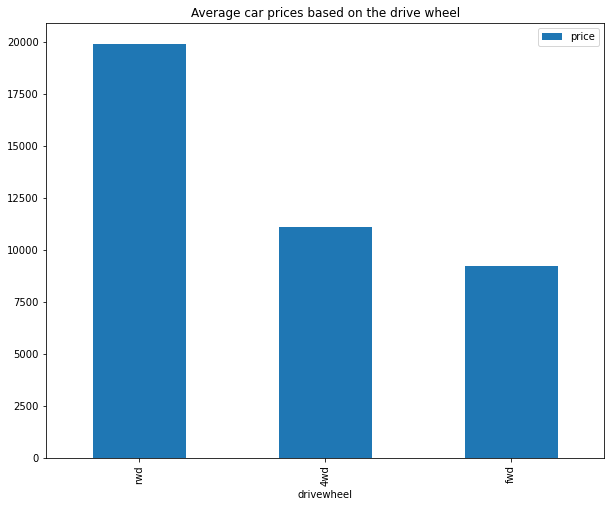

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
graph = pd.DataFrame(df.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False))
graph.plot.bar(ax=ax)
plt.title('Average car prices based on the drive wheel')
plt.show()

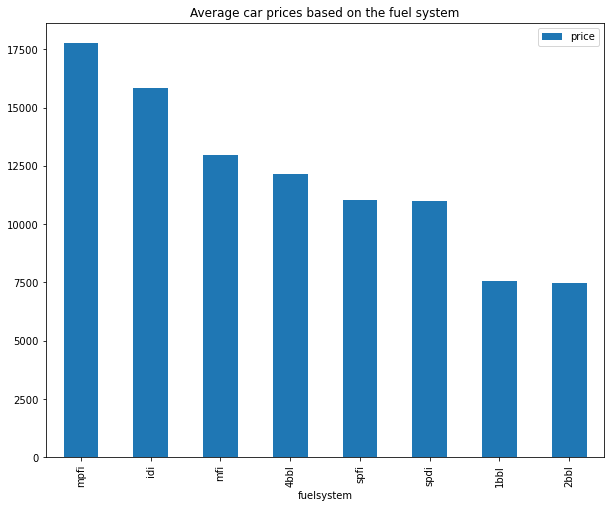

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
graph = pd.DataFrame(df.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False))
graph.plot.bar(ax=ax)
plt.title('Average car prices based on the fuel system')
plt.show()

> Most of our cars in our dataset are made by toyota.

> Jaguar and Buick seem to have the highest average car prices. Chevorlet has the lowest prices.

> Hardtop and Convertible car bodies have higher average prices than the other car bodies.

> RWD drivewheel has higher average prices than 4WD & FWD drivewheels.

> "Front" engine location has higher average city and highway mpg than "Rear" engine location.

> MPFI & IDI fuel systems have higher average prices than the other fuel systems.

---------------

In [14]:
df[['carlength','carwidth','carheight']].head()

,carlength,carwidth,carheight
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


- As we can see, the car length has a bit higher values than the car width and car height. We will apply data normalization on those 3 columns so that they have a similar range of values.


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['carlength','carwidth','carheight']] = sc.fit_transform(df[['carlength','carwidth','carheight']])

In [16]:
df[['carlength','carwidth','carheight']].head()

,carlength,carwidth,carheight
0,-0.426521,-0.844782,-2.020417
1,-0.426521,-0.844782,-2.020417
2,-0.231513,-0.190566,-0.543527
3,0.207256,0.136542,0.235942
4,0.207256,0.230001,0.235942


-------------

- Now after we have made sure our dataset is clean, let's check which features we are going to pick for our upcoming linear regression model.
- We will apply that by checking the correlation between our features and our target.

- First we will check our numerical features

C:\Users\Marwan\AppData\Local\Temp/ipykernel_3964/2423953311.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


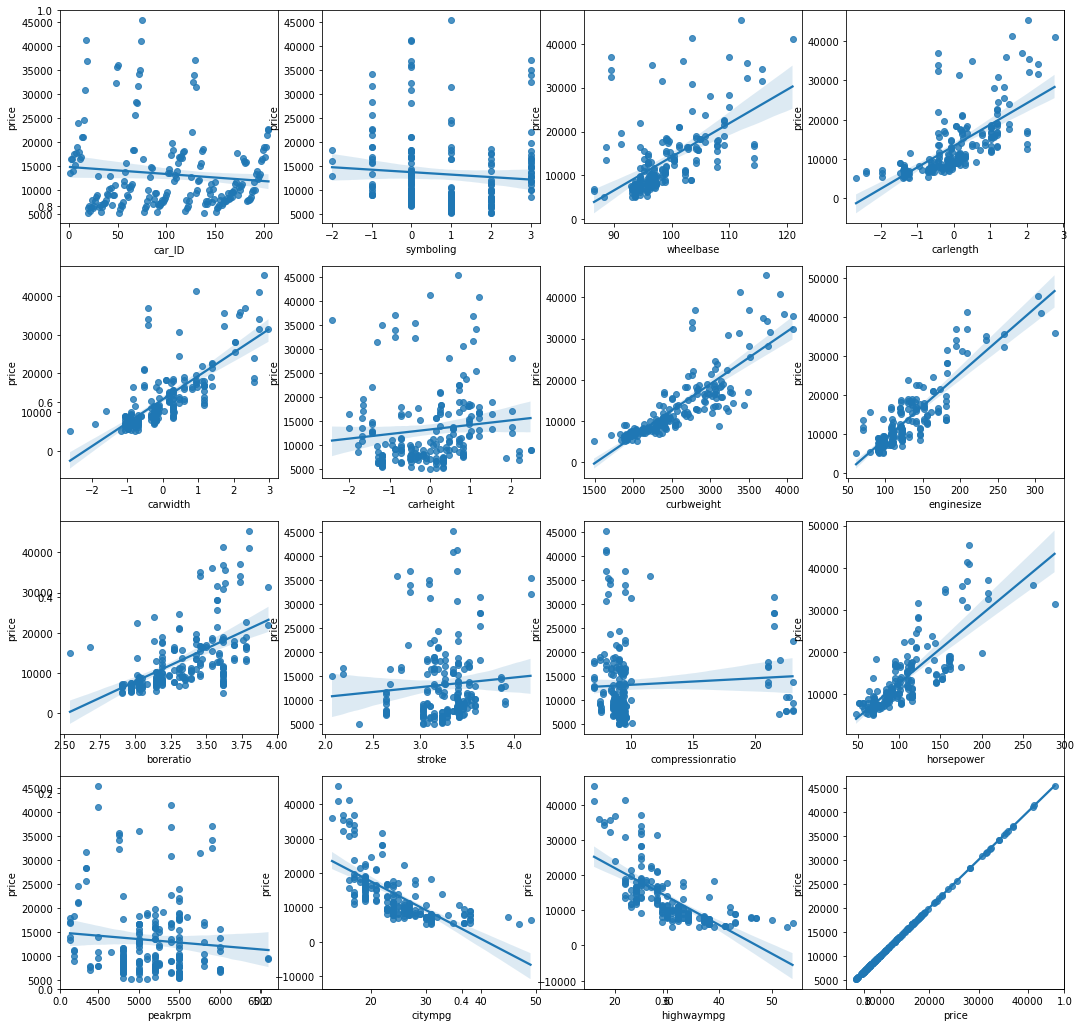

In [17]:
df_numeric = df[['car_ID', 'symboling','wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

fig, axes = plt.subplots(figsize=(18,18))

for i in range(16):
    fig.add_subplot(4,4,i+1)
    sns.regplot(x=df_numeric.columns[i],y='price',data=df_numeric)

fig.show()

    From the above graphs we can see that:

    The price is strongly correlated with:
    ('wheelbase', 'carlength', 'carwidth' , 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg','highwaympg')

    The price is weakly correlated with:
    ('car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio' , 'peakrpm')

    *** We will ignore the weakly correlated features in our calculations ***


- We can also visualize that correlation between the price and the numerical features from the following heatmap

<AxesSubplot:>

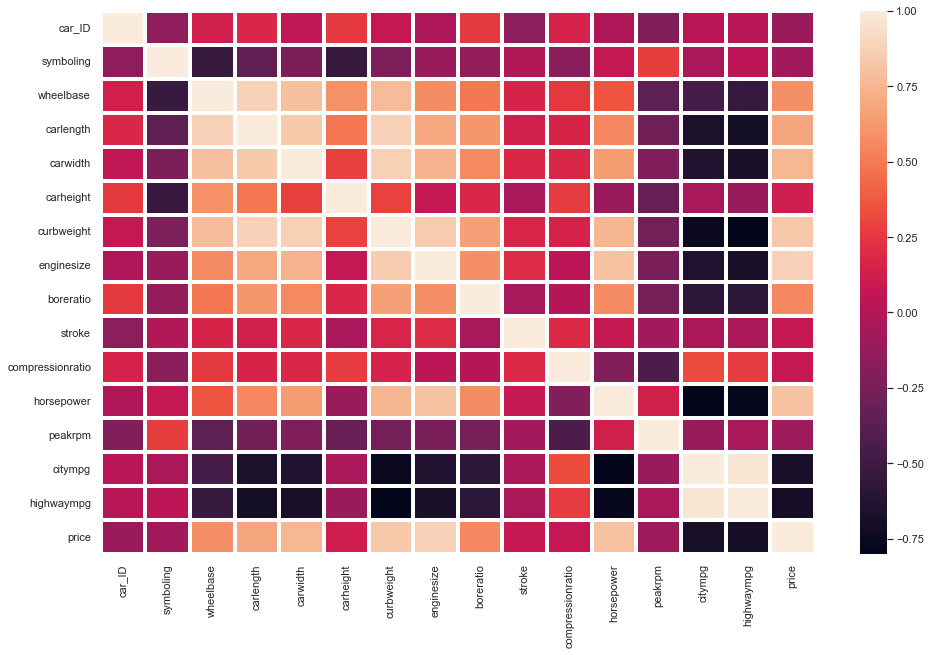

In [18]:
sns.set(rc = {'figure.figsize':(16,10)})
sns.heatmap(df_numeric.corr(),linewidths=4)

- We will now do the same operation on the categorical features using boxplots.

C:\Users\Marwan\AppData\Local\Temp/ipykernel_3964/1970424879.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


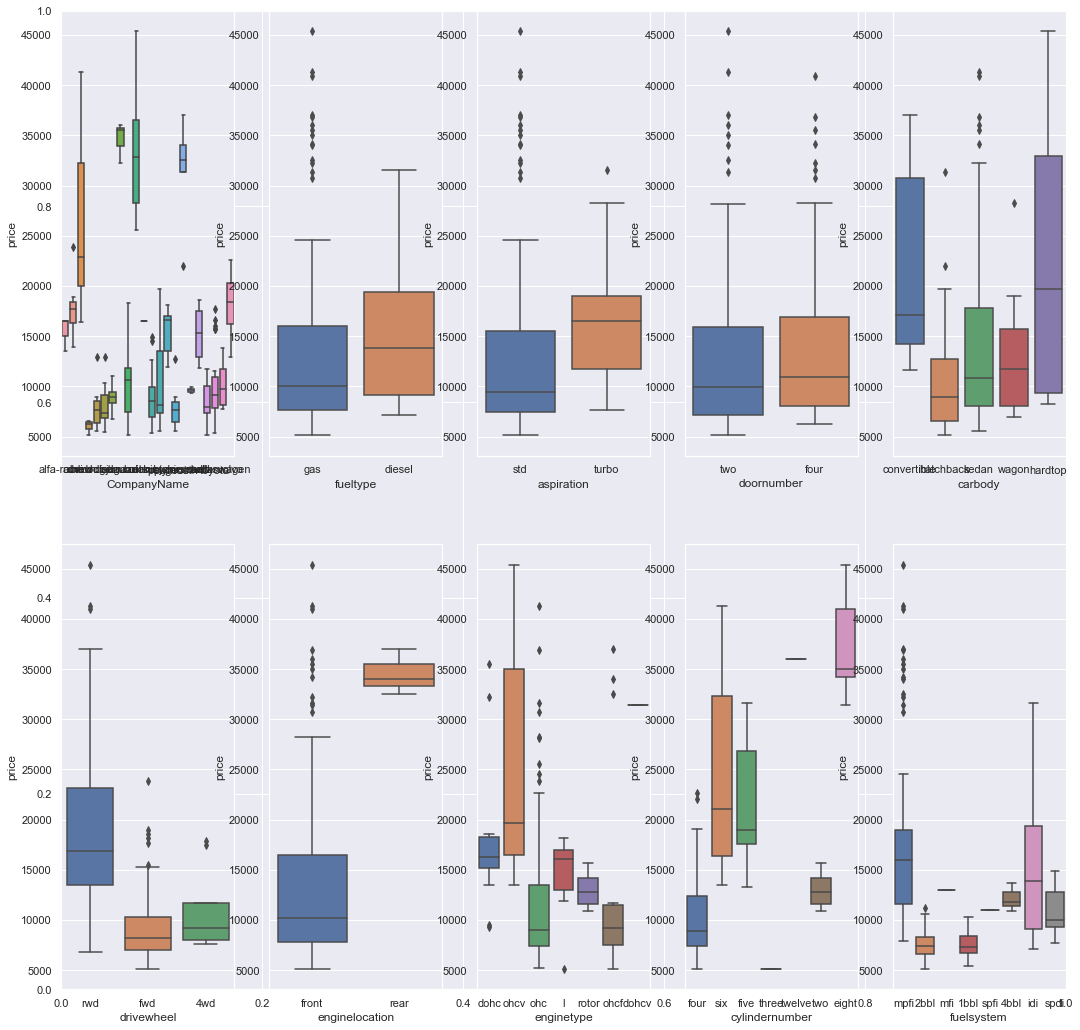

In [19]:
df_categorical = df[['CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem','price']]

fig, axes = plt.subplots(figsize=(18,18))

for i in range(10):
    fig.add_subplot(2,5,i+1)
    sns.boxplot(x=df_categorical.columns[i],y='price',data=df_categorical)

fig.show()

    From the above graphs we can see that the ('CompanyName','fueltype','aspiration', 'enginetype', 'cylindernumber', 'doornumber', 'carbody') features are not a good predictors for the price because the distributions of price between their different categories have a significant overlap.

    But, the ('drivewheel', 'enginelocation', 'fuelsystem') features are a good predictors for the price because the distribuits of price between their different categories are distinct enough.

# Encoding our categorical features

In [20]:
le = LabelEncoder()

df['drivewheel'] = le.fit_transform(df.drivewheel)
df['enginelocation'] = le.fit_transform(df.enginelocation)
df['fuelsystem'] = le.fit_transform(df.fuelsystem)

# Model Development

In [21]:
X = df[['wheelbase', 'carlength', 'carwidth' , 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg','highwaympg',
'drivewheel', 'enginelocation', 'fuelsystem']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle=True)

print("We have", X_train.shape[0], "training samples")
print("We have", X_test.shape[0], "test samples")

We have 143 training samples
We have 62 test samples


In [22]:
lm = LinearRegression()

lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

# Model Evaluation

- Showing our first 5 predictions results

In [23]:
np_y_test = np.array(y_test)

print ("{:<20} {:<20} {:<25}".format('Test No.','Real Value', 'Predicted Value'))

for i in range(5):
    print ("{:<20} {:<20} {:<25}".format(i+1, np_y_test[i], round(predictions[i],1)))


Test No.             Real Value           Predicted Value          
1                    19699.0              22980.9                  
2                    8358.0               7634.2                   
3                    7053.0               6909.4                   
4                    8921.0               11596.0                  
5                    7957.0               7626.4                   


- Our Model Accuracy

In [24]:
print("Model accuracy is", round(r2_score(y_test,predictions)*100,2), "%")

Model accuracy is 88.02 %


## <h2 align="center"> Thank You! <h2/>

# <h2 align="center"> Author <h2/>

<h2 align="center"> <a href="https://www.linkedin.com/in/marwan-mostafa-2863b0210/"> Marwan Mostafa </a> <h2/>

## <h3 align="center"> Machine Learning Workshop '22- GDSC CU FCAI <h3/>